In [1]:
!pip install dtreeviz

In [28]:
import sys
!{sys.executable} -m pip install xgboost

In [2]:
import sys
!{sys.executable} -m pip install shape

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost as xgb

import matplotlib.gridspec as gridspec

from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, r2_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

        
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("cancer patient data sets.csv")
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df.drop(columns=['index', 'Patient Id'], axis=1, inplace=True)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [6]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [8]:
print('Cancer Level: ', df['Level'].unique())
df["Level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
print('Cancer Levels: ', df['Level'].unique())

Cancer Level:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

# Разведовательный анализ(EDA)

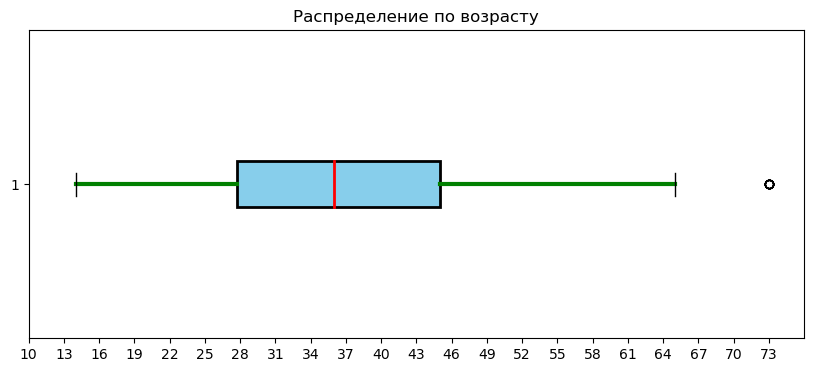

In [10]:
plt.figure(figsize=(10,4))
plt.boxplot(df['Age'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', linewidth=2),
            whiskerprops=dict(color='green',linewidth=3), 
            medianprops=dict(color='red',linewidth=2)
           )
plt.title('Распределение по возрасту')
plt.xticks(np.arange(10, max(df['Age'])+1, 3))
plt.show()

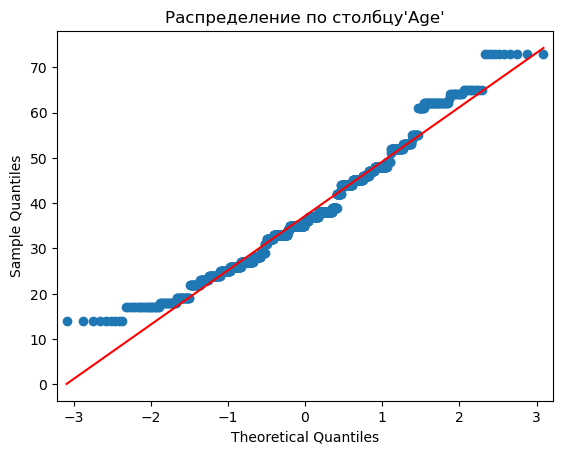

In [11]:
import statsmodels.api as sm

data = data = df['Age'].dropna()
 
#QQ график
sm.qqplot(data, line='s')
plt.title("Распределение по столбцу'Age'")
plt.show()

In [12]:
df_corr = df.corr()
df_corr

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.060048
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,-0.164985
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,0.636038
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,0.718710
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,0.713839
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,0.673255
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,0.701303
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,0.609971
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,0.706273
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422,0.827435


<Axes: title={'center': 'Correlation Matrix'}>

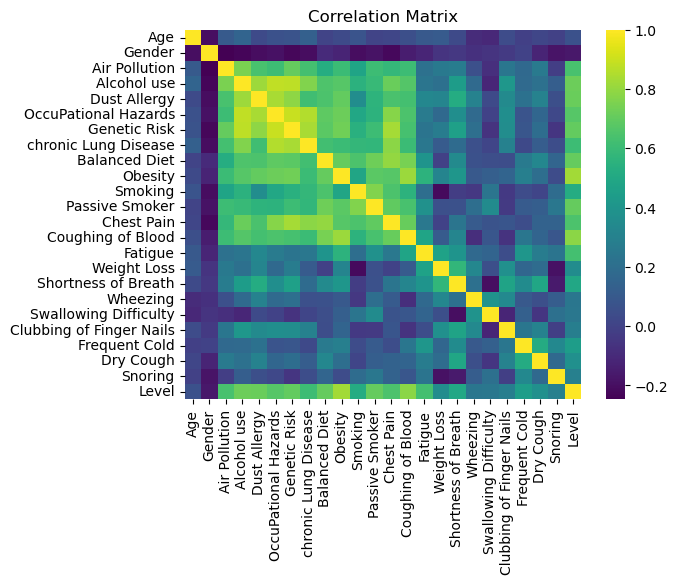

In [13]:
plt.title("Correlation Matrix")
sns.heatmap(df_corr, cmap='viridis')

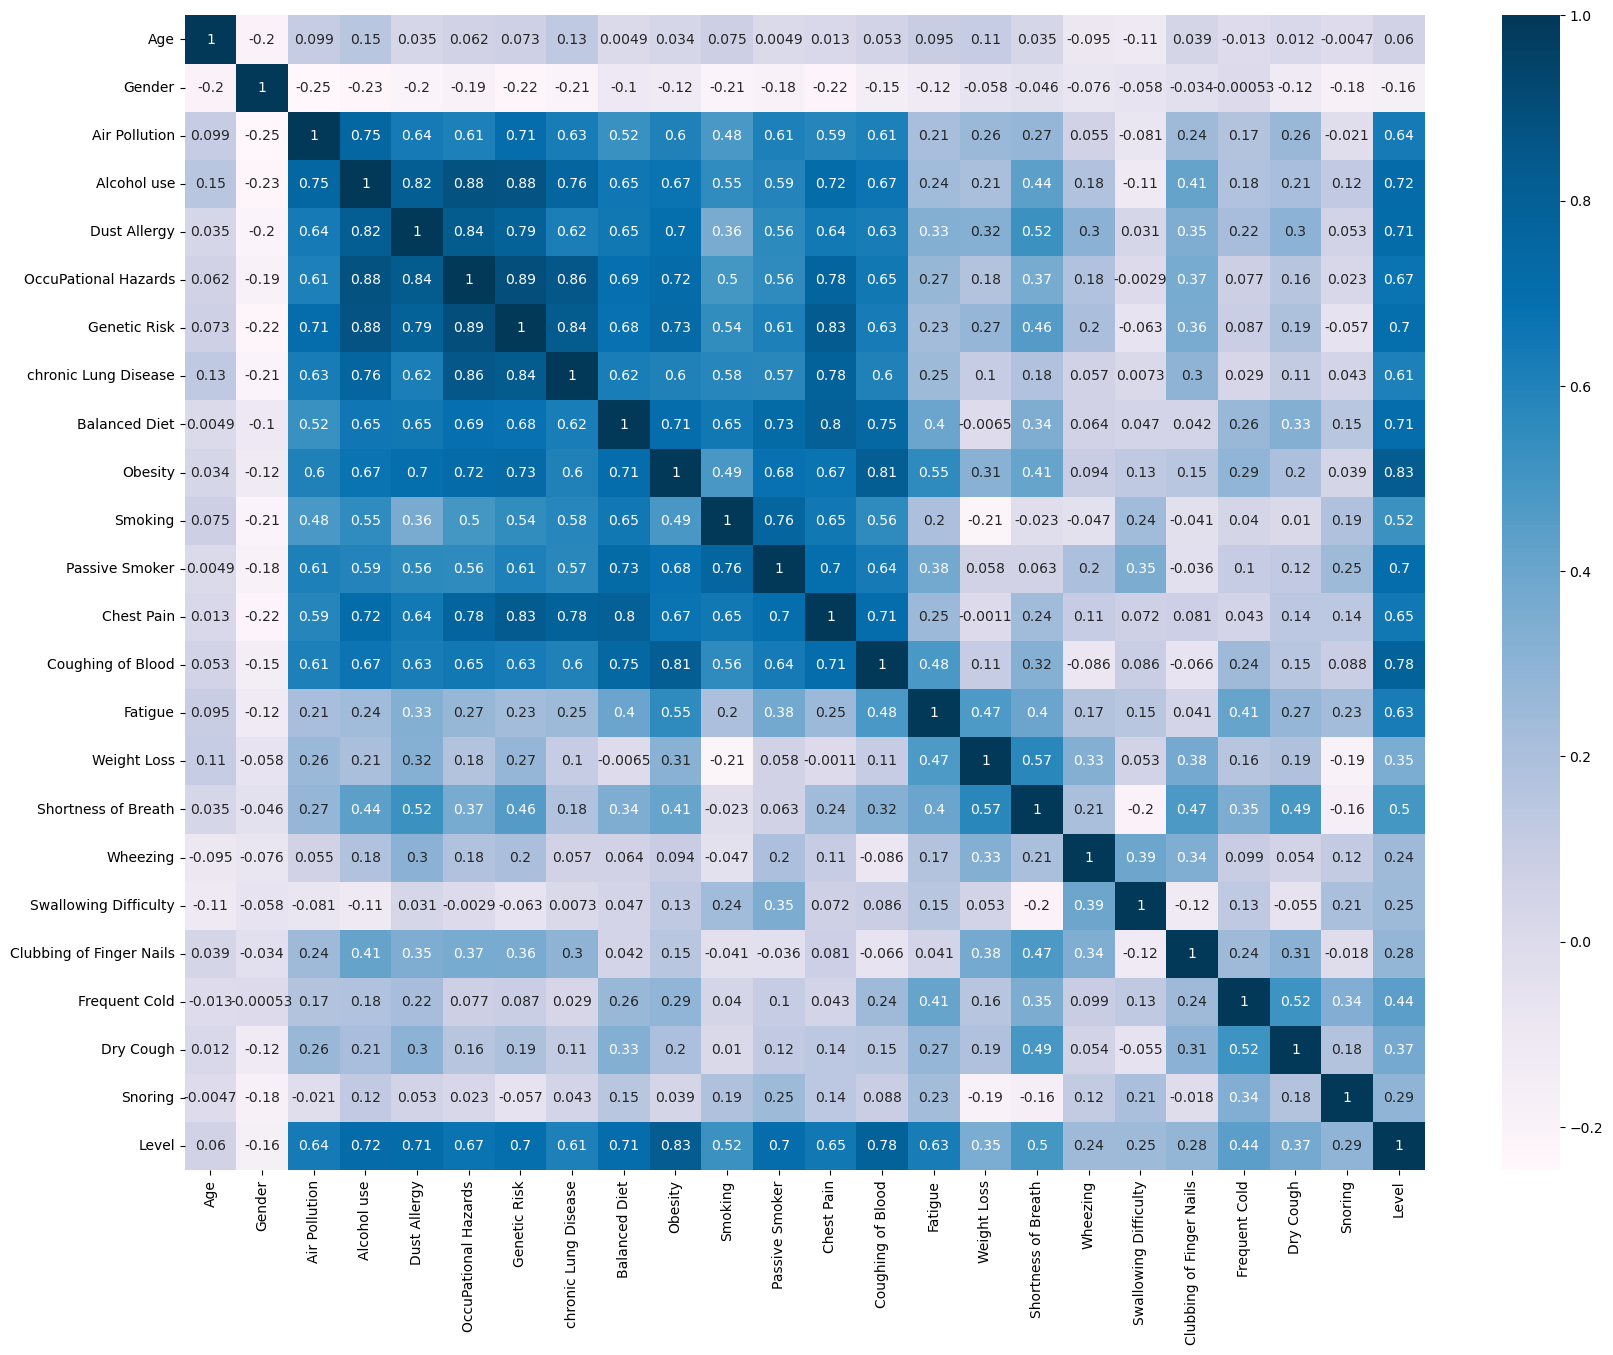

In [14]:
# Heatmap

print('\n')
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()
print('\n')

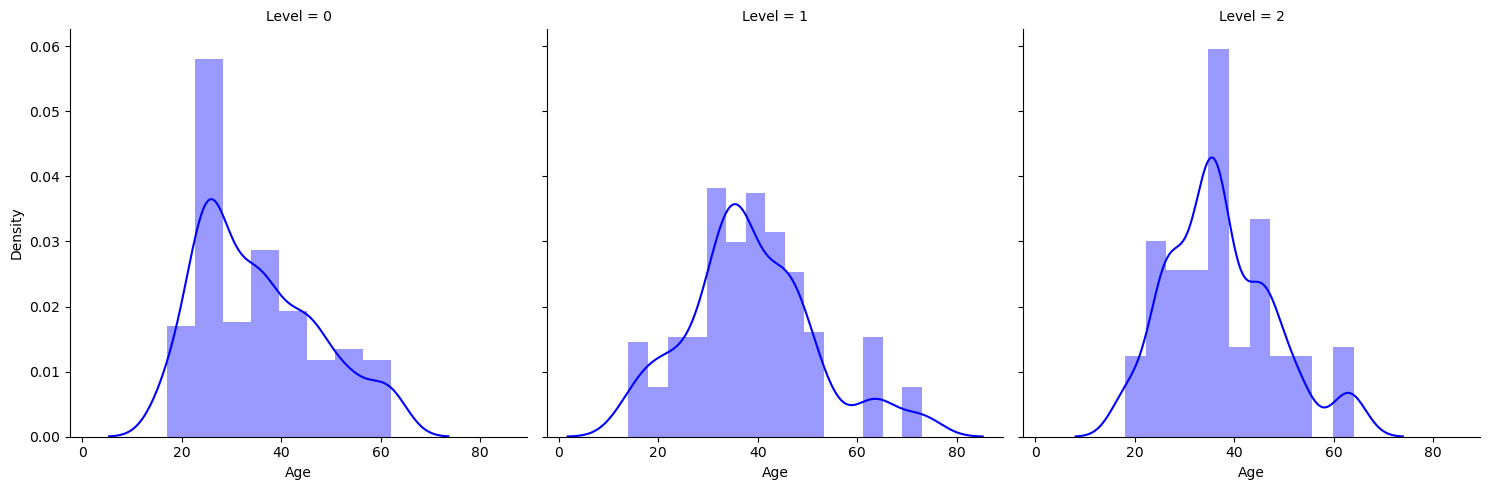

In [15]:
sea = sns.FacetGrid(df, col = "Level", height = 5)
sea.map(sns.distplot, "Age", color="blue")

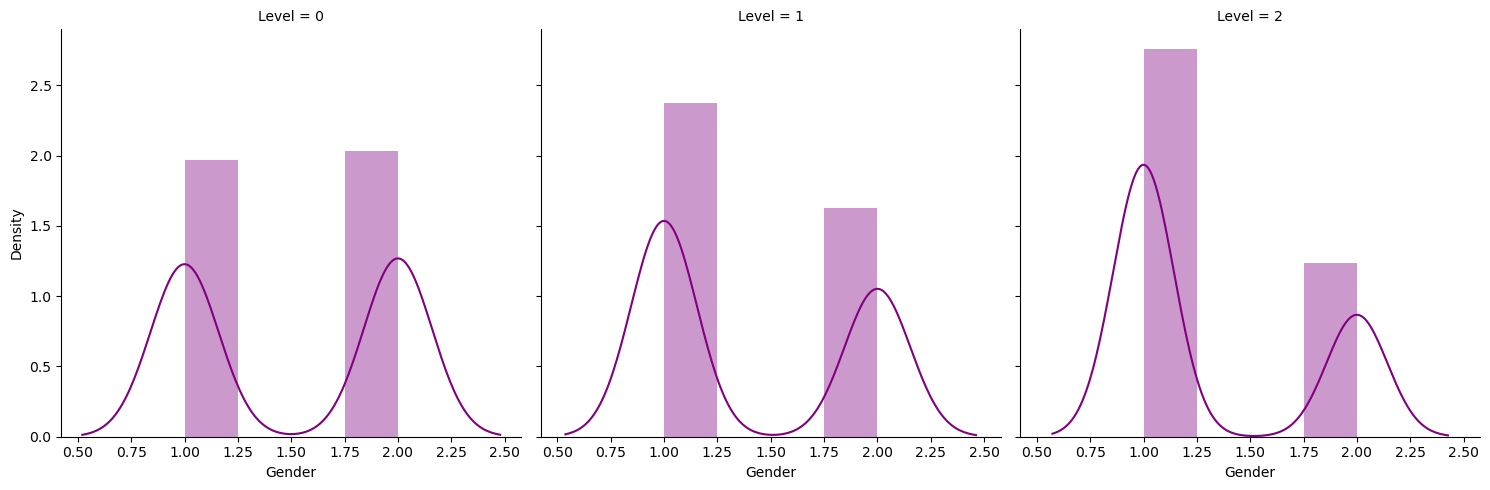

In [16]:
sea = sns.FacetGrid(df, col = "Level", height = 5)
sea.map(sns.distplot, "Gender", color="purple")

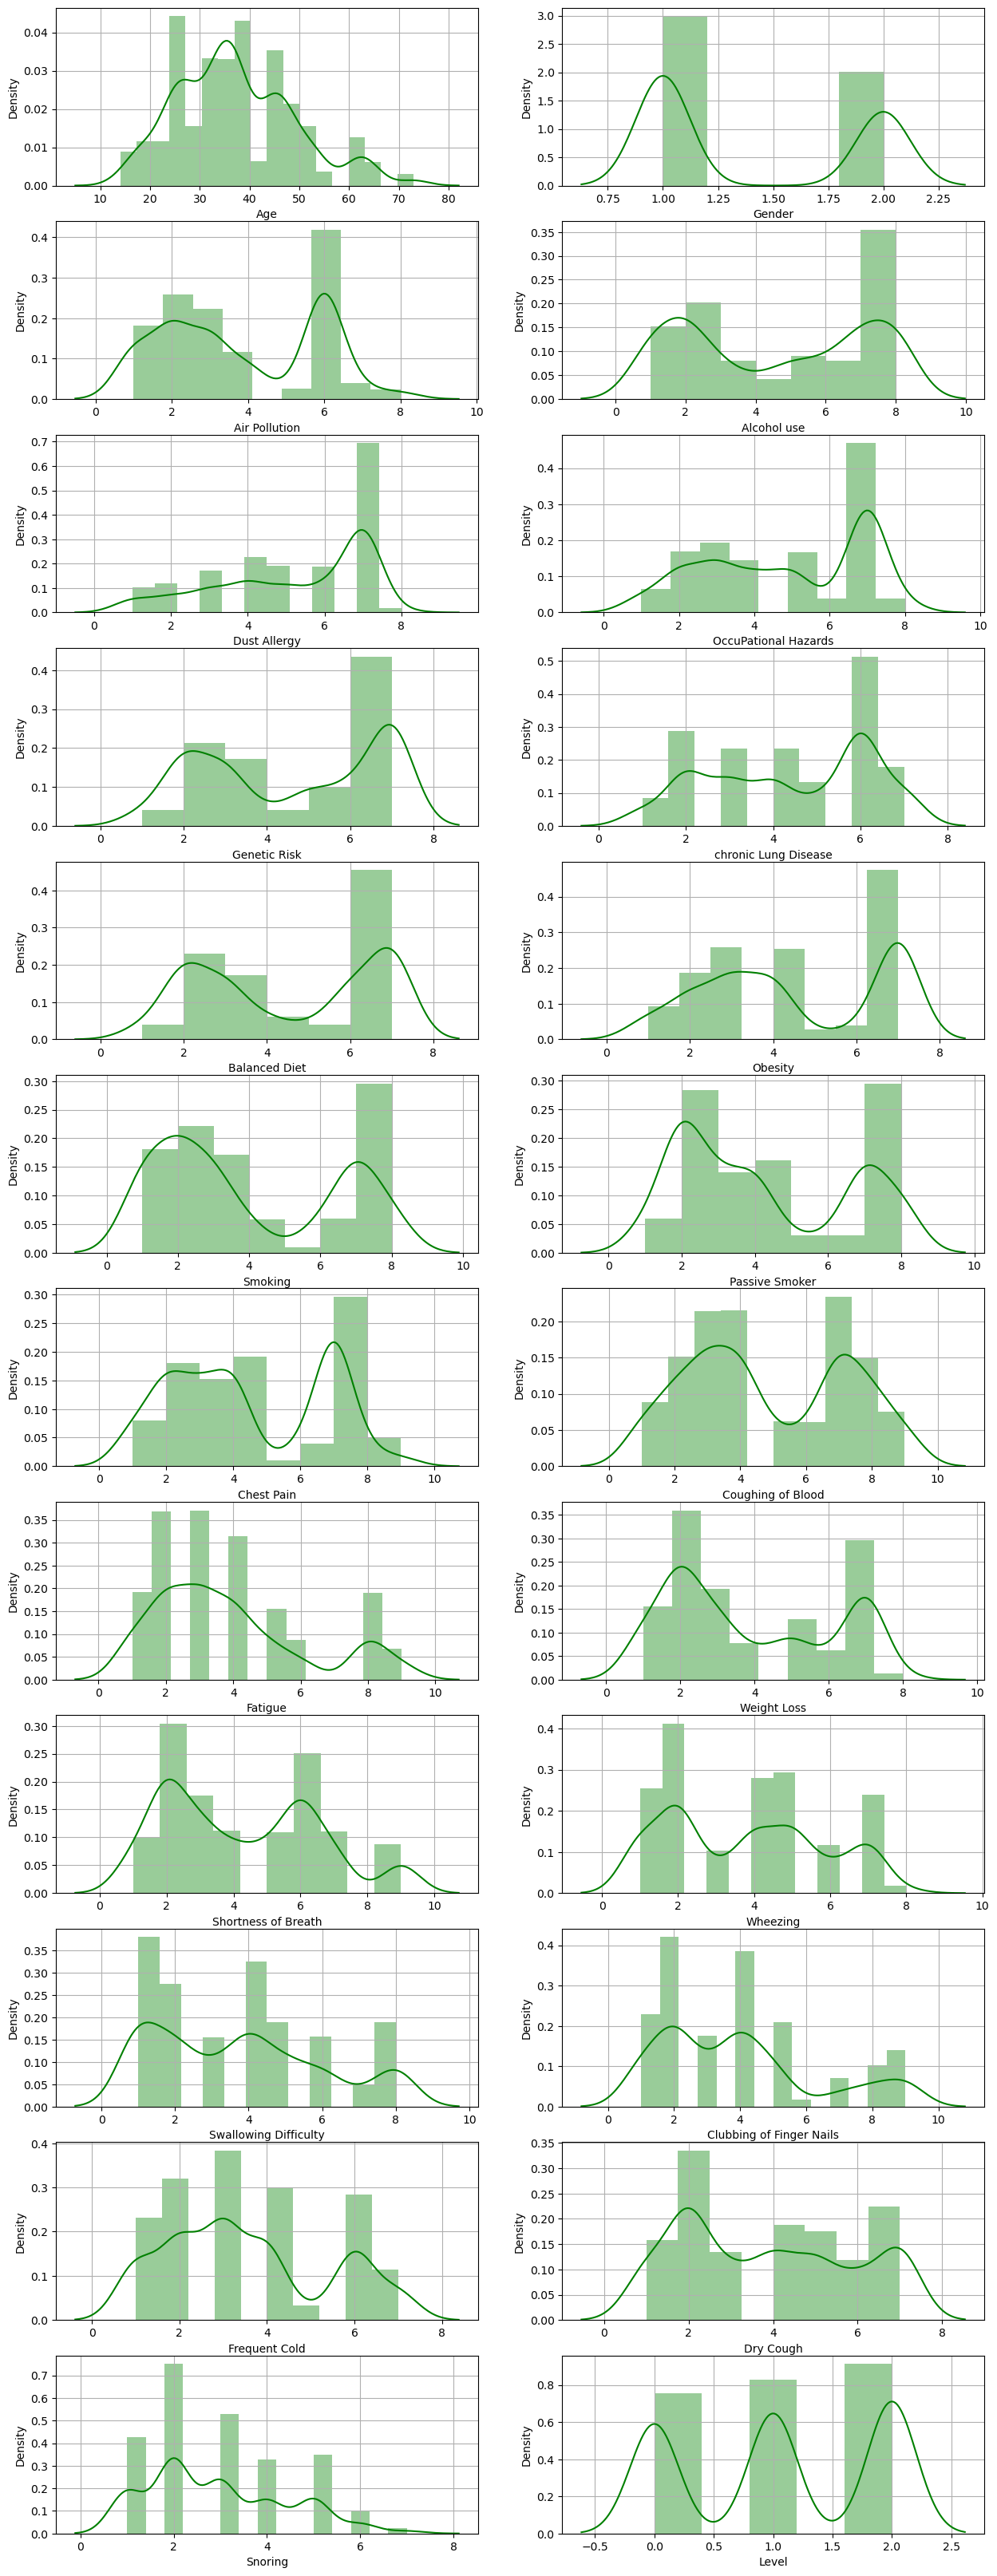

In [17]:
plt.figure(figsize = (15, 55))

for i in range(24):
    plt.subplot(16, 2, i+1)
    sns.distplot(df.iloc[:, i], color = 'green')
    plt.grid()

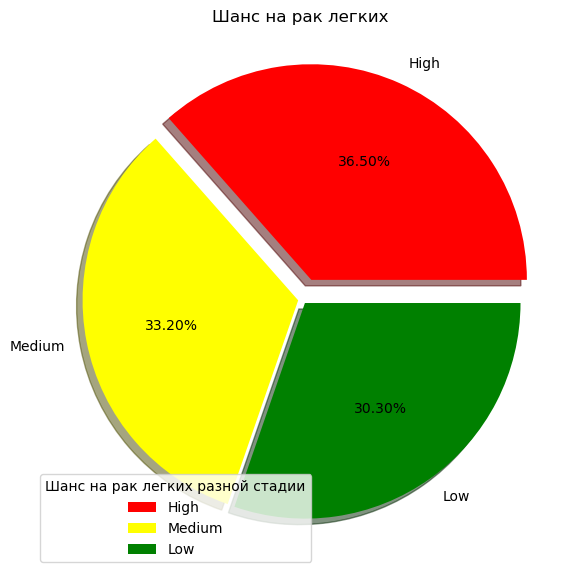

In [18]:
plt.figure(figsize = (15,7))
colors = ['red', 'yellow', 'green']
plt.title("Шанс на рак легких ")
plt.pie(df['Level'].value_counts(), explode = (0.1, 0.02, 0.02), labels = ['High', 'Medium', 'Low'], autopct = "%1.2f%%", shadow = True, colors = colors)
plt.legend(title = "Шанс на рак легких разной стадии", loc = "lower left")

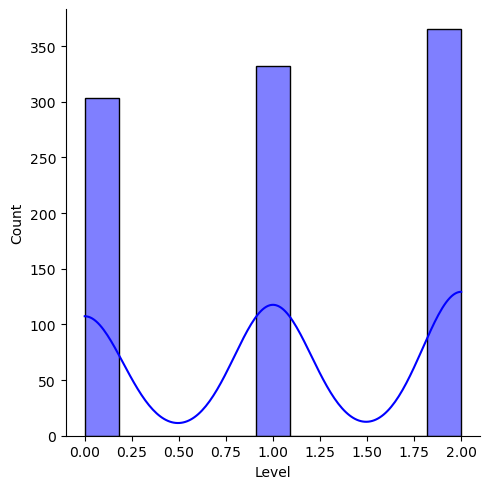

In [19]:
sns.displot(df['Level'], kde=True, color = 'blue')

In [20]:
dfviz = df.copy()

In [21]:
y = df.pop('Level')

In [22]:
x = df

# Обучаем и тренируем

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
results = pd.DataFrame(columns = ['model', 'f1_train', 'f1_test', 'r2_train', 'r2_test'])

In [26]:
print('X train shape: ', x_train.shape)
print('Y train shape: ', y_train.shape)
print('\nTest Shape\n')
print('X test shape: ', x_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (800, 23)
Y train shape:  (800,)

Test Shape

X test shape:  (200, 23)
Y test shape:  (200,)


In [27]:
def performTest(y_pred):
    print("Test Data Metrics:")
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    print("R2 Score : ", r2_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])
    
    cm.plot( cmap='plasma', ax=None, xticks_rotation='horizontal')
    print("\n")

In [28]:
def performTrain(y_pred_train):
    print("Train Data Metrics:")
    print("Precision : ", precision_score(y_train, y_pred_train, average='micro'))
    print("Recall : ", recall_score(y_train, y_pred_train, average='micro'))
    print("Accuracy : ", accuracy_score(y_train, y_pred_train))
    print("F1 Score : ", f1_score(y_train, y_pred_train, average='micro'))
    print("R2 Score : ", r2_score(y_train, y_pred_train))

    print("\n")

# Садим случайный лес))

In [29]:
from sklearn.model_selection import GridSearchCV
param_RF1 = {
    'n_estimators': 50, 
    'max_depth': 3,
    'min_samples_split': 3,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_samples': 0.8,
    'criterion': 'gini'    
}
param_RF = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [2],
    'criterion':['gini'],
    'min_samples_split': [2, 3],  
    'min_samples_leaf': [2, 3],
    'random_state' : [42],
    'max_samples': [0.4]
    
}

In [36]:
model_tuning = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_RF, cv=5)
model_tuning.fit(x_train, y_train)

best_params = model_tuning.best_params_
print("Best Parameters:", best_params)
model_rf = RandomForestClassifier(**best_params)
model_rf.fit(x_train, y_train)

Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_samples': 0.4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}


RandomForestClassifier(max_depth=2, max_samples=0.4, min_samples_leaf=2,
                       random_state=42)

In [30]:
#Тренируем
train_predictions = model_rf.predict(x_train)
r2_train = r2_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions, average = 'micro')

#Тестируем
test_predictions = model_rf.predict(x_test)
r2_test = r2_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions, average = 'micro')

#Итог
performTrain(train_predictions)
performTest(test_predictions)

#Сохраняем
results.loc[0,'model'] = 'RandomForest Classifier'
results.loc[0,'f1_train'] = f1_train
results.loc[0,'f1_test'] = f1_test
results.loc[0,'r2_train'] = r2_train
results.loc[0,'r2_test'] = r2_test
results.loc[0,'short'] = 'RF'
score_model_rf = model_rf.score(x_test, y_test)

NameError: name 'model_rf' is not defined

# AdaBoost

In [43]:
param_ADA = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 1],
    'random_state' : [42],
    'algorithm': ['SAMME.R'],   
}

In [45]:
model_tuning = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_ADA, cv=5)
model_tuning.fit(x_train, y_train)

best_params = model_tuning.best_params_
print("Best Parameters:", best_params)
model_ada = AdaBoostClassifier(**best_params)
model_ada.fit(x_train, y_train)

Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 42}


AdaBoostClassifier(learning_rate=0.01, random_state=42)

Train Data Metrics:
Precision :  0.90125
Recall :  0.90125
Accuracy :  0.90125
F1 Score :  0.90125
R2 Score :  0.8507938381632533


Test Data Metrics:
Precision :  0.895
Recall :  0.895
Accuracy :  0.895
F1 Score :  0.895
R2 Score :  0.8425255895916913

 [[47  8  0]
 [ 0 63  0]
 [ 0 13 69]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        55
           1       0.75      1.00      0.86        63
           2       1.00      0.84      0.91        82

    accuracy                           0.90       200
   macro avg       0.92      0.90      0.90       200
weighted avg       0.92      0.90      0.90       200

******************************************************





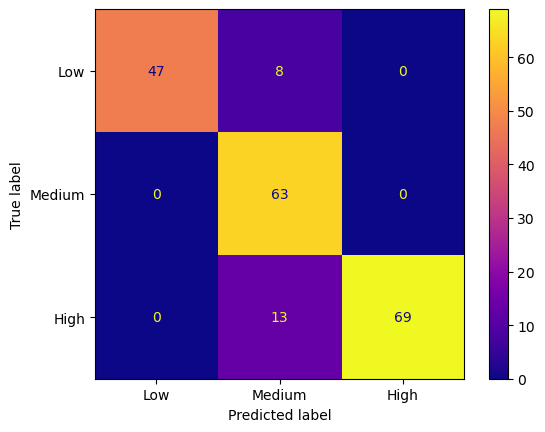

In [46]:
#Трениурем
train_predictions = model_ada.predict(x_train)
r2_train = r2_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions, average = 'micro')

#Тест
test_predictions = model_ada.predict(x_test)
r2_test = r2_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions, average = 'micro')

#Итог
performTrain(train_predictions)
performTest(test_predictions)

#Сохраняем
results.loc[1,'model'] = 'ADABoost Classifier'
results.loc[1,'f1_train'] = f1_train
results.loc[1,'f1_test'] = f1_test
results.loc[1,'r2_train'] = r2_train
results.loc[1,'r2_test'] = r2_test
results.loc[1,'short'] = 'ADA'
score_model_ada = model_ada.score(x_test, y_test)

In [64]:
params_etc ={'n_estimators':[200, 300, 500],
            'max_depth': [3, 4, 5],
            'min_samples_split':  [2, 3],
            'min_samples_leaf':  [2, 3],
            'max_features': ['sqrt'],
            'ccp_alpha': [0.1],
            'random_state' : [42]}

In [65]:
model_tuning = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=params_etc, cv=5)
model_tuning.fit(x_train, y_train)

best_params = model_tuning.best_params_
print("Best Parameters:", best_params)
model_etc = ExtraTreesClassifier(**best_params)
model_etc.fit(x_train, y_train)

Best Parameters: {'ccp_alpha': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500, 'random_state': 42}


ExtraTreesClassifier(ccp_alpha=0.1, max_depth=4, min_samples_leaf=2,
                     n_estimators=500, random_state=42)

Train Data Metrics:
Precision :  0.8875
Recall :  0.8875
Accuracy :  0.8875
F1 Score :  0.8875
R2 Score :  0.7846898424127958


Test Data Metrics:
Precision :  0.895
Recall :  0.895
Accuracy :  0.895
F1 Score :  0.895
R2 Score :  0.7975329009036032

 [[53  0  2]
 [ 9 44 10]
 [ 0  0 82]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.85      0.96      0.91        55
           1       1.00      0.70      0.82        63
           2       0.87      1.00      0.93        82

    accuracy                           0.90       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.91      0.90      0.89       200

******************************************************





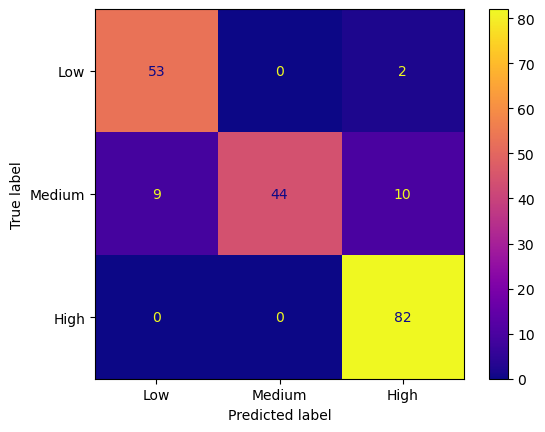

In [66]:
# Train
train_predictions = model_etc.predict(x_train)
r2_train = r2_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions, average = 'micro')

# Test
test_predictions = model_etc.predict(x_test)
r2_test = r2_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions, average = 'micro')

#Result
performTrain(train_predictions)
performTest(test_predictions)

# Save
results.loc[2,'model'] = 'ExtraTrees Classifier'
results.loc[2,'f1_train'] = f1_train
results.loc[2,'f1_test'] = f1_test
results.loc[2,'r2_train'] = r2_train
results.loc[2,'r2_test'] = r2_test
results.loc[2,'short'] = 'ExT'
score_model_etc = model_etc.score(x_test, y_test)

# Дерево решений

In [37]:
params_DT2 ={'max_depth': [3],
            'min_samples_split':  [2],
            'min_samples_leaf':  [1],
            'max_features': ['sqrt'],
            }

params_DT1 ={'max_depth': [1, 2, 3],
            'min_samples_split': [1, 2, 3],
            'min_samples_leaf': [0, 1, 2],
            'max_features': ['sqrt', 'log2', 'auto'],
            'max_leaf_nodes': [ 5, 10, 15, 17],
            'random_state' : [42],
            'min_impurity_decrease': [0, 0.001, 0.01],
            'ccp_alpha': [0.0, 0.001, 0.01, 0.1]
           }

params_DT ={'max_depth': [3, 4],
            'min_samples_split': [1, 2, 3],
            'min_samples_leaf': [0, 1, 2],
            'max_features': ['sqrt', 'log2', 'auto'],
            'max_leaf_nodes': [ 5, 10, 15, 17],
            'random_state' : [42]}

In [68]:
model_tuning = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params_DT, cv=5)
model_tuning.fit(x_train, y_train)

best_params = model_tuning.best_params_
print("Best Parameters:", best_params)
model_dt = DecisionTreeClassifier(**best_params)
model_dt.fit(x_train, y_train)

Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


DecisionTreeClassifier(max_depth=4, max_features='sqrt', max_leaf_nodes=10,
                       random_state=42)

In [38]:
train_predictions = model_etc.predict(x_train)
r2_train = r2_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions, average = 'micro')

# Test
test_predictions = model_etc.predict(x_test)
r2_test = r2_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions, average = 'micro')

#Result
performTrain(train_predictions)
performTest(test_predictions)

# Save
results.loc[2,'model'] = 'ExtraTrees Classifier'
results.loc[2,'f1_train'] = f1_train
results.loc[2,'f1_test'] = f1_test
results.loc[2,'r2_train'] = r2_train
results.loc[2,'r2_test'] = r2_test
results.loc[2,'short'] = 'ExT'
score_model_etc = model_etc.score(x_test, y_test)

NameError: name 'model_etc' is not defined

# Визуализация дерева решений

In [44]:
import sys
!{sys.executable} -m pip install dfviz

In [39]:
import dfviz
feature_names = dfviz.columns[0:23]
viz = dfviz.copy()
viz["Level"]=viz["Level"].values.astype(str)
print(viz.dtypes)
target_names = viz['Level'].unique().tolist()

AttributeError: module 'dfviz' has no attribute 'columns'

Диаграмма дерева решений

In [47]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('tree_visualization.png')

NameError: name 'model_dt' is not defined

<Figure size 1500x1000 with 0 Axes>

In [48]:
import dtreeviz

viz_model = dtreeviz.model(model_dt,
                           X_train=x_train, y_train=y_train,
                           feature_names=feature_names,
                           target_name='Lung Cancer',
                           class_names=['Low', 'Medium', 'High'])

v = viz_model.view()
v.save("Lung Cancer.svg")

NameError: name 'model_dt' is not defined

In [6]:
viz_model.view()

NameError: name 'viz_model' is not defined

# XGBoost

In [49]:
params_XGB1 ={'n_estimators': 366,
                  'num_leaves': 10,
                  'max_depth': 9,
                 'lambda': 0.1444861779926268,
                  'subsample': 0.01,
                  'alpha': 2.603602561261043e-06,
                   'colsample_bytree': 1.0  }

params_XGB ={'n_estimators': [100, 200, 300],
             'num_leaves': [2, 5, 7, 10],
             'max_depth': [2, 3, 5],         
             'subsample': [0.01],
             'learning_rate': [0.01],
             'objective': ['multi:softmax'],
             'random_state' : [42],
             'num_class': [3]}

In [50]:
model_tuning = GridSearchCV(estimator=XGBClassifier(), param_grid=params_XGB, cv=5)
model_tuning.fit(x_train, y_train)

best_params = model_tuning.best_params_
print("Best Parameters:", best_params)
model_xgb = XGBClassifier(**best_params)
model_xgb.fit(x_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [9]:
# Обучаем
train_predictions = model_xgb.predict(x_train)
r2_train = r2_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions, average = 'micro')

# Тестируем
test_predictions = model_xgb.predict(x_test)
r2_test = r2_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions, average = 'micro')

# Итог
performTrain(train_predictions)
performTest(test_predictions)

# Сохраняем
results.loc[4,'model'] = 'XGB Classifier'
results.loc[4,'f1_train'] = f1_train
results.loc[4,'f1_test'] = f1_test
results.loc[4,'r2_train'] = r2_train
results.loc[4,'r2_test'] = r2_test
results.loc[4,'short'] = 'XGB'
score_model_xgb = model_xgb.score(x_test, y_test)

NameError: name 'model_xgb' is not defined

# MLP

In [10]:
params_mlp1 ={'hidden_layer_sizes': 100,
            'random_state': 2,
            'alpha': 0.001,
            'activation': 'relu',
            'learning_rate_init': 0.001,
            'max_iter': 100,
             'batch_size': 32,
             'early_stopping':True,
             'validation_fraction': 0.1,
             'tol': 1e-4
            }

params_mlp2 ={'hidden_layer_sizes': [50, 75, 100],
             'random_state': [2],
             'alpha': [0.01, 0.001],
             'activation': ['relu', 'tanh'],
             'learning_rate_init': [0.001, 0.01],
             'max_iter': [100, 200, 300],
             'solver': ['adam', 'lbfgs'],
             'early_stopping': [True],
             'validation_fraction': [0.1, 0.2],
             
            }

params_mlp ={'hidden_layer_sizes': [50, 75, 100],
             'learning_rate_init': [0.001],
             'max_iter': [100, 200, 300],
             'solver': ['adam'],
             'early_stopping': [True],
             'random_state' : [42]}

In [11]:
model_tuning = GridSearchCV(estimator=MLPClassifier(), param_grid=params_mlp, cv=5)
model_tuning.fit(x_train, y_train)

best_params = model_tuning.best_params_
print("Best Parameters:", best_params)
model_mlp = MLPClassifier(**best_params)
model_mlp.fit(x_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [12]:
# Обучаем
train_predictions = model_mlp.predict(x_train)
r2_train = r2_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions, average = 'micro')

# Тест
test_predictions = model_mlp.predict(x_test)
r2_test = r2_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions, average = 'micro')

# Результат
performTrain(train_predictions)
performTest(test_predictions)

# Сохраняем
results.loc[5,'model'] = 'MLP Classifier'
results.loc[5,'f1_train'] = f1_train
results.loc[5,'f1_test'] = f1_test
results.loc[5,'r2_train'] = r2_train
results.loc[5,'r2_test'] = r2_test
results.loc[5,'short'] = 'MLP'
score_model_mlp = model_mlp.score(x_test, y_test)

NameError: name 'model_mlp' is not defined

# Анализ результатов

In [13]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'c']
colors1 = ['c', 'lime', 'pink', 'magenta', 'yellow', 'cyan']
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(results['short']))
bar1 = plt.bar(index, results['f1_train'], bar_width,
                   label='f1_train ', color='red')
bar2 = plt.bar([i + bar_width for i in index], results['f1_test'], bar_width,
                label='f1_test', color='cyan')
test (light color)', s=500, color=colors1)
plt.xlabel('Модели')
plt.ylabel('f1_score')
plt.title('Результаты оценки f1_train и f1_test по моделями')
plt.xticks([i + bar_width/2 for i in index], results['short'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 10) (2485618841.py, line 10)

 Важность функции для случайной классификации лесов

In [14]:
feature_importances_model_rf = pd.DataFrame(x_train.columns)
feature_importances_model_rf.columns = ['feature']
feature_importances_model_rf["score_model_rf"] = pd.Series(model_rf.feature_importances_)
feature_importances_model_rf.sort_values(by='score_model_rf', ascending=False)

NameError: name 'pd' is not defined

In [15]:
importances = model_rf.feature_importances_
feature_names = df.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lime')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

NameError: name 'model_rf' is not defined

In [16]:
explainer = shap.Explainer(model_rf, x)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values, x)

NameError: name 'shap' is not defined